# Focusing light with a lens

In this example, we will analyze how light is focused using a lens. We will use several algorithms.
From an ondulatory point of view, a lens as a transmittance object

$t(\xi,\eta)=P(\xi,\eta)\exp\left[-ik\frac{\left(\xi^{2}+\eta^{2}\right)}{2f'}\right]$ 

where $P(\xi,\eta)$ is the shape of the lens, $k=2\pi/\lambda$ and f' is the focal distance of the lens.

## Lens in x mode

In [1]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.utils_optics import beam_width_1D, FWHM1D, MTF_ideal, MTF_parameters

In [2]:
focal = 25 * mm
diameter = 4 * mm

# Initial parameters
x0 = np.linspace(-diameter / 2 - 50 * um, diameter / 2 + 50 * um, 1024 * 32)
wavelength = 0.6238 * um

# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.lens(x0=0.0, focal=focal, radius=diameter / 2)


In [4]:
u1 = t0 * u0
u2 = u1.RS(z=focal, verbose=False)


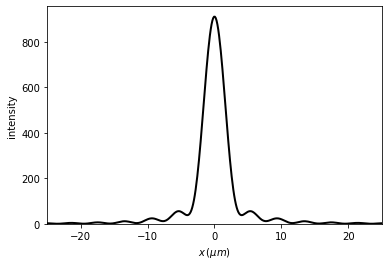

In [5]:
u2.draw()
plt.xlim(-25, 25)


### Beam width computation

In [6]:
width, center = beam_width_1D(u2.u, u2.x)


4.8440193446230575 3.610817918990506


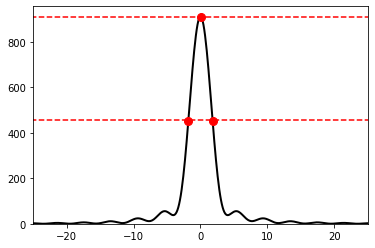

In [7]:
fwhm = FWHM1D(u2.x, np.abs(u2.u)**2, has_draw=True, percentage=0.5)
plt.xlim(-25, 25)
plt.ylim(bottom=0)
print(width, fwhm)

### MTF

frecuencia de bin_level = 256.49 lineas/mm


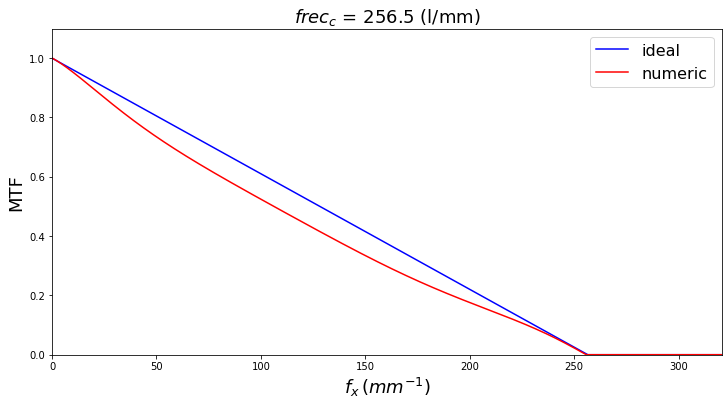

In [8]:
freq_real, mtf_norm = u2.MTF(has_draw=False)

freq_ideal = np.linspace(0, 350, 600)
mtf_ideal, freq_corte = MTF_ideal(freq_ideal,
                                  wavelength=wavelength,
                                  diameter=diameter,
                                  focal=focal,
                                  kind='1D',
                                  has_draw=False,
                                  verbose=True)

plt.figure(figsize=(12, 6))
plt.plot(freq_ideal, mtf_ideal, 'b', label='ideal')
plt.xlabel("$f_x\,(mm^{-1})$", fontsize=18)
plt.ylabel("MTF", fontsize=18)
plt.xlim(left=0, right=1.25 * freq_corte)
plt.ylim(bottom=0, top=1.1)
plt.title("$frec_c$ = {:2.1f} (l/mm)".format(freq_corte), fontsize=18)

plt.plot(freq_real, mtf_norm, 'r', label='numeric')

plt.legend(fontsize=16)


### Several rays

In [9]:
# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_waves_several_inclined(A=1, num_beams=7, max_angle=10 * degrees)


In [10]:
us1 = t0 * u0
us2 = us1.RS(z=focal, verbose=False)


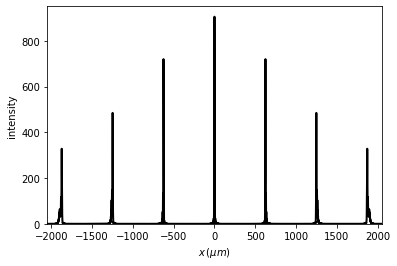

In [11]:
us2.draw()


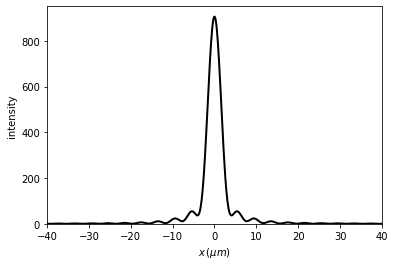

In [12]:
us2.draw()
plt.xlim(-40, 40)


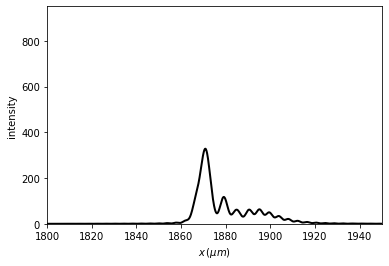

In [13]:
us2.draw()
plt.xlim(1800, 1950)


### Binary Fresnel lens

With the modules diffractio.scalar_sources_X, scalar_fields_X and scalar_masks_X for propagating a field generated by a scalar light only the propagation to a given distances is performed. If you need to visualize the z propagation it is better the use of `diffractio.scalar_fields_XZ`, since it performs a for loop over a number of distances given by a linspace array. This for loop is executed, when possible, using multiprocessing, since there is not computational interaction between different locations z. 

In [14]:
# initial data
x0 = np.linspace(-750 * um, 750 * um, 1024 * 32)
wavelength = 0.6238 * um
focal = 20 * mm
radius = 250 * um

#definition of source
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

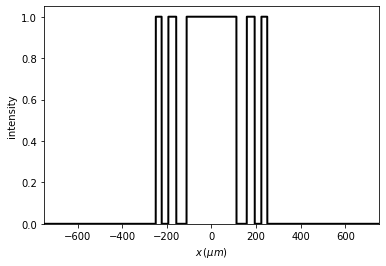

In [15]:
#definition of mask
t0 = Scalar_mask_X(x0, wavelength)
t0.fresnel_lens(x0=0 * um,
                radius=radius,
                focal=focal,
                kind='amplitude',
                phase=np.pi)
t0.draw(kind='intensity')

In [16]:
u1 = t0.RS(z=20 * mm)


Good result: factor 254.34


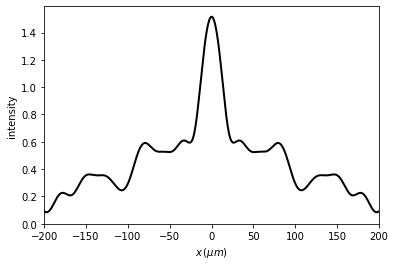

In [17]:
u1.draw(logarithm=1, normalize='intensity')
plt.xlim(-200, 200)


## XZ lens: CZT scheme

In [18]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

In [19]:
focal = 15 * mm
diameter = 4 * mm

x0 = np.linspace(-diameter / 2, diameter / 2, 1024)
wavelength = 0.6238 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.lens(x0=0.0, radius=diameter / 2, focal=focal)

u1 = u0 * t0


In [25]:
z0 = np.linspace(14.8 * mm, 15.2 * mm, 512)


This procedure is deprecated. It is more ineficient than with CZT algorithm.

It requires plt.xlim(-20,20) after drawing. The drawing is badly sampled.


In [30]:
%%time
u2 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u2.incident_field(u1)
u2.RS(num_processors=4);

CPU times: user 539 ms, sys: 303 ms, total: 842 ms
Wall time: 1.5 s


In [31]:
%%time
xout=np.linspace(-20,20,256)
u2 = u1.CZT(z=z0, xout=xout)

CPU times: user 1.36 s, sys: 10.4 ms, total: 1.37 s
Wall time: 1.43 s


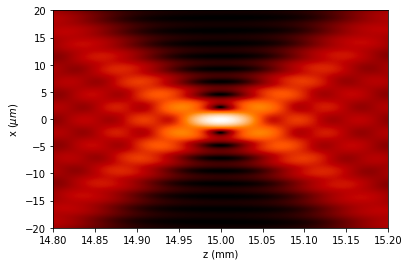

In [32]:
u2.draw(logarithm=1e-1, z_scale='mm')


In [33]:
x_f, z_f = u2.search_focus()


x = -0.235 um, z = 14999.609 um


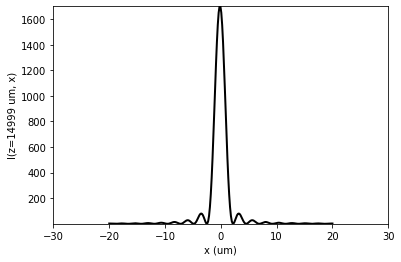

In [34]:
u2.profile_transversal(z0=z_f)
plt.xlim(-30, 30)


### XZ lens: BPM scheme

870.4808704808705


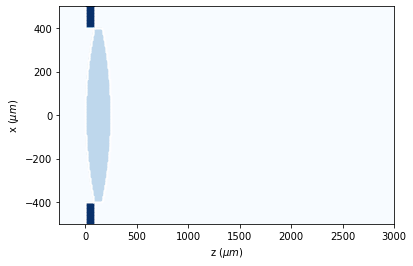

In [35]:
focal = 1 * mm
diameter = 1 * mm

x0 = np.linspace(-diameter / 2, diameter / 2, 1024 * 4)
z0 = np.linspace(-250 * um, focal + 2 * mm, 1024)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal, _ = u1.lens_convergent(r0=(0, 0),
                              aperture=diameter / 1.25,
                              radius=(1 * mm, -1 * mm),
                              thickness=.25 * mm,
                              refraction_index=1.55,
                              angle=0 * degrees,
                              mask=(100 * um, 3 + 0.1j))
print(focal)
u1.draw_refraction_index()
edge_matrix = u1.borders

u1.smooth_refraction_index(type_filter=2, pixels_filtering=50)


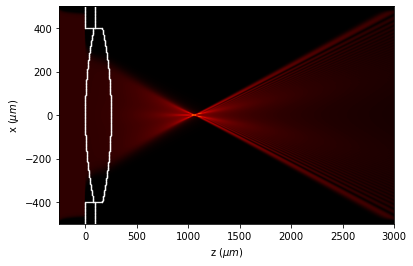

In [36]:
u1.BPM(verbose=False)
u1.draw(logarithm=True,
        normalize='maximum',
        draw_borders=True,
        edge_matrix=edge_matrix)


In [37]:
x_focus, z_focus = u1.search_focus()


x = -0.122 um, z = 1062.072 um


In [38]:
width, z_center = u1.beam_widths(kind='sigma4', has_draw=(0, 0))


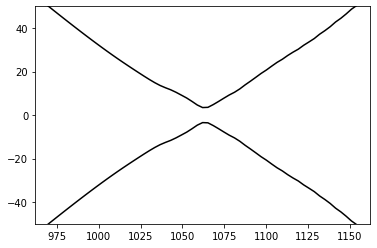

In [39]:
plt.plot(u1.z, width, 'k')
plt.plot(u1.z, -width, 'k')
plt.xlim(z_focus - 100 * um, z_focus + 100 * um)
plt.ylim(-50, 50)


## Effect of rotation

In [40]:
x0 = np.linspace(-200 * um, 200 * um, 1024 * 2)
z0 = np.linspace(-50 * um, 400 * um, 1024 * 4)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)


192.30769230769232


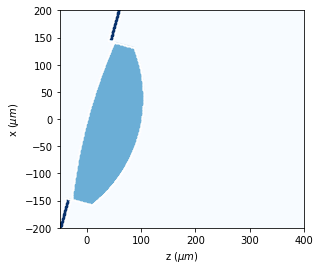

In [41]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal, _ = u1.lens_convergent(r0=(0, 0),
                              aperture=300 * um,
                              radius=(1000 * um, -250 * um),
                              thickness=100 * um,
                              refraction_index=2,
                              angle=15 * degrees,
                              mask=(10 * um, 3 + 0.05j))
print(focal)
u1.draw_refraction_index(scale='scaled')
edge_matrix = u1.borders

u1.smooth_refraction_index(pixels_filtering=25, type_filter=2)


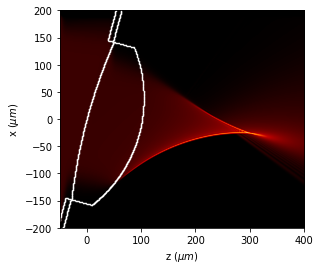

In [42]:
u1.BPM(has_edges=True, verbose=False)
u1.draw(logarithm=True,
        normalize='maximum',
        draw_borders=True,
        scale='scaled',
        edge_matrix=edge_matrix)


Here we see how several rays converge

In [45]:
x0 = np.linspace(-200 * um, 200 * um, 1024 * 1)
z0 = np.linspace(-25 * um, 400 * um, 1024 * 4)
wavelength = 0.6238 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beams_several_parallel(A=1,
                                num_beams=15,
                                w0=5,
                                z0=10,
                                x_central=0.0,
                                x_range=300.0,
                                theta=0.0)


192.30769230769232


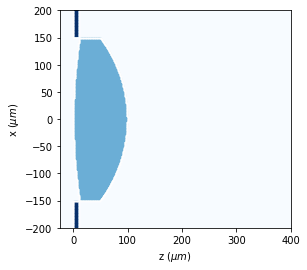

In [46]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
focal, _ = u1.lens_convergent(r0=(0, 0),
                              aperture=300 * um,
                              radius=(1000 * um, -250 * um),
                              thickness=100 * um,
                              refraction_index=2,
                              angle=0 * degrees,
                              mask=(10 * um, 3 + 0.05j))
print(focal)
u1.draw_refraction_index(scale='scaled')
edge_matrix = u1.borders

u1.smooth_refraction_index(pixels_filtering=25, type_filter=2)


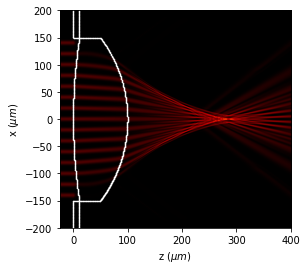

In [47]:
u1.BPM(verbose=False)
u1.draw(logarithm=True,
        normalize='maximum',
        draw_borders=True,
        scale='scaled',
        edge_matrix=edge_matrix)


### XY scheme

In [48]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

In [49]:
diameter = 2 * mm
focal = 25 * mm

x0 = np.linspace(-diameter / 2, diameter / 2, 1024)
y0 = np.linspace(-diameter / 2, diameter / 2, 1024)
wavelength = 0.6238 * um

In [50]:
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.plane_wave()

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.lens(r0=(0 * um, 0 * um),
        radius=(diameter / 2, diameter / 2),
        focal=(focal, focal))


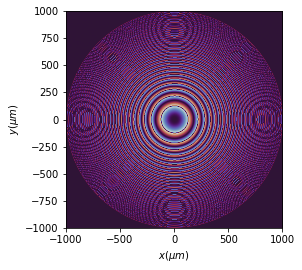

In [51]:
t0.draw('phase')


In [52]:
u1 = u0 * t0


In [53]:
u2 = u1.RS(z=focal)


In [55]:
u2.cut_resample(x_limits=(-20, 20),
                y_limits=(-20, 20),
                num_points=(1024, 1024),
                new_field=False,
                interp_kind=(3, 1))


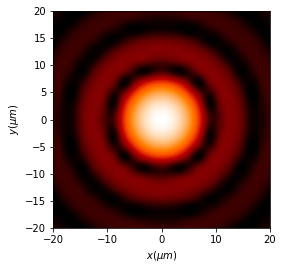

In [56]:
u2.draw(logarithm=1e-2)


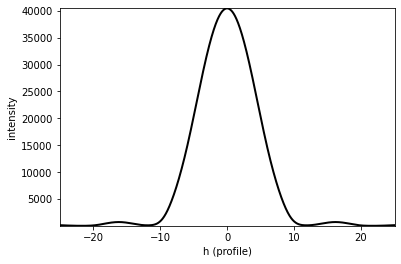

In [57]:
u2.draw_profile(point1=(-25, 0),
                point2=(25, 0),
                npixels=2048,
                kind='intensity',
                order=2)


In [58]:
def intensity_area(u, r0, radius, power=1, has_draw=True):
    intensities = np.zeros_like(radius)
    mask = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)

    for i, r in enumerate(radius):
        mask.circle(r0=r0, radius=(r, r), angle=0)
        masked_field = u * mask
        intensities[i] = masked_field.intensity().sum()**power

    intensities = intensities / intensities.max()
    if has_draw is True:
        plt.figure()
        plt.plot(rs, intensities)
        plt.ylim(bottom=0)
        plt.xlim(left=0, right=rs[-1])
    return intensities

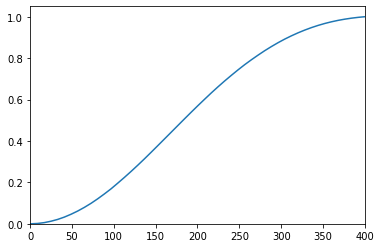

In [59]:
rs = np.linspace(1 * um, 400 * um, 51)
intensities = intensity_area(u2, r0=(0, 0), radius=rs, power=1)


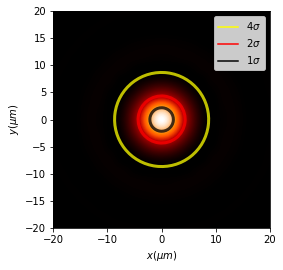

In [60]:
u2.beam_width_4s(has_draw=True)


## Vector scheme

### Linear polarization

In [61]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_fields_XY import Vector_field_XY


In [62]:
diameter = 2 * mm
x0 = np.linspace(-diameter / 2, diameter / 2, 1024)
y0 = np.linspace(-diameter / 2, diameter / 2, 1024)
wavelength = 0.6238 * um


In [63]:
focal = 25 * mm
limit = 50 * um


In [64]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.plane_wave(A=1)

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.lens(r0=(0 * um, 0 * um),
        radius=(diameter / 2, diameter / 2),
        focal=(focal, focal))

u1 = u0 * t0


In [65]:
EM0 = Vector_source_XY(x0, y0, wavelength)
EM0.constant_polarization(u1, v=[(1 - 1j) / 2, (1 + 1j) / 2])


In [66]:
EM1 = EM0.VRS(z=focal)


In [67]:
EM1.cut_resample(x_limits=(-limit / 2, limit / 2),
                 y_limits=(-limit / 2, limit / 2),
                 num_points=(1024, 1024),
                 new_field=False,
                 interp_kind=(3, 1))


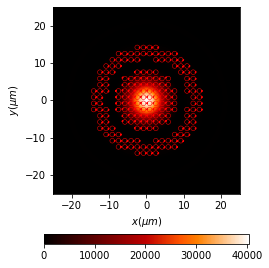

In [68]:
EM1.__draw_ellipses__(num_ellipses=(30, 30),
                      color_line='r',
                      amplification=0.75,
                      head_width=.25,
                      line_width=0.5)


### Radial polarization

In [69]:
diameter = 2 * mm

x0 = np.linspace(-diameter / 2, diameter / 2, 1024)
y0 = np.linspace(-diameter / 2, diameter / 2, 1024)
wavelength = 0.6238 * um

focal = 25 * mm


In [70]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.plane_wave(A=1)

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.lens(r0=(0 * um, 0 * um),
        radius=(diameter / 2, diameter / 2),
        focal=(focal, focal))

u1 = u0 * t0


In [71]:
EM0 = Vector_source_XY(x0, y0, wavelength)
EM0.azimuthal_wave(u1)

In [72]:
EM1 = EM0.VRS(z=focal)


In [73]:
EM1.cut_resample(x_limits=(-limit / 2, limit / 2),
                 y_limits=(-limit / 2, limit / 2),
                 num_points=(1024, 1024),
                 new_field=False,
                 interp_kind=(3, 1))


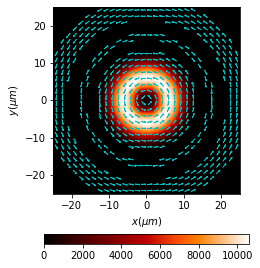

In [74]:
EM1.__draw_ellipses__(num_ellipses=(30, 30),
                      color_line='c',
                      amplification=0.75,
                      head_width=.25)
